# Read in Star Wars survey data

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
print(star_wars.columns)
print(star_wars.head())

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Keep only meaningful RespondentID

In [2]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.shape
star_wars['RespondentID']

1       3.292880e+09
2       3.292880e+09
3       3.292765e+09
4       3.292763e+09
5       3.292731e+09
6       3.292719e+09
7       3.292685e+09
8       3.292664e+09
9       3.292654e+09
10      3.292640e+09
11      3.292638e+09
12      3.292635e+09
13      3.292609e+09
14      3.292597e+09
15      3.292587e+09
16      3.292583e+09
17      3.292581e+09
18      3.292573e+09
19      3.292565e+09
20      3.292562e+09
21      3.292522e+09
22      3.292521e+09
23      3.292512e+09
24      3.292483e+09
25      3.292465e+09
26      3.292448e+09
27      3.292420e+09
28      3.292384e+09
29      3.292380e+09
30      3.292377e+09
            ...     
1157    3.288426e+09
1158    3.288423e+09
1159    3.288423e+09
1160    3.288422e+09
1161    3.288421e+09
1162    3.288418e+09
1163    3.288418e+09
1164    3.288417e+09
1165    3.288415e+09
1166    3.288414e+09
1167    3.288413e+09
1168    3.288410e+09
1169    3.288410e+09
1170    3.288409e+09
1171    3.288403e+09
1172    3.288403e+09
1173    3.288

## Convert Yes/No answers to Boolean types.

In [3]:
cols = ['Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?']
for col in cols:
    star_wars[col] = star_wars[col].map({'Yes': True, 'No': False})

star_wars[cols]

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,True,True
2,False,NaN
3,True,False
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True
10,True,False


In [4]:
print(star_wars[cols[0]].value_counts(dropna=False))
print(star_wars[cols[1]].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Movies watched by the respondents, conveted to Boolean

In [27]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [25]:
star_wars.iloc[:,8].head()

1    Star Wars: Episode VI Return of the Jedi
2                                         NaN
3                                         NaN
4    Star Wars: Episode VI Return of the Jedi
5    Star Wars: Episode VI Return of the Jedi
Name: Unnamed: 8, dtype: object

In [29]:
import numpy as np

movies = ['Star Wars: Episode I  The Phantom Menace', 
          'Star Wars: Episode II  Attack of the Clones',
          'Star Wars: Episode III  Revenge of the Sith',
          'Star Wars: Episode IV  A New Hope',
          'Star Wars: Episode V The Empire Strikes Back',
          'Star Wars: Episode VI Return of the Jedi']

for i, col in enumerate(star_wars.columns[3:9]):
    star_wars[col] = star_wars[col].map({movies[i]: True, np.NaN: False})
    star_wars.rename({col:'seen_{}'.format(i+1)}, axis=1, inplace=True)




AttributeError: 'DataFrame' object has no attribute 'ilc'

In [32]:
star_wars.iloc[:, 3:9].describe()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
count,1186,1186,1186,1186,1186,1186
unique,2,2,2,2,2,2
top,True,False,False,True,True,True
freq,673,615,636,607,758,738


## Rank the 6 movies

In [34]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [35]:
for i, col in enumerate(star_wars.columns[9:15]):
    star_wars.rename({col:'ranking_{}'.format(i+1)}, axis=1, inplace=True)
star_wars.iloc[:, 9:15].describe()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
count,835.000000,836.000000,835.000000,836.000000,836.000000,836.000000
mean,3.732934,4.087321,4.341317,3.272727,2.513158,3.047847
std,1.656122,1.365365,1.400464,1.825901,1.578620,1.666897
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000
50%,4.000000,4.000000,5.000000,3.000000,2.000000,3.000000
75%,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


## Find the movie with the highest ranking

In [36]:
star_wars.iloc[:, 9:15].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

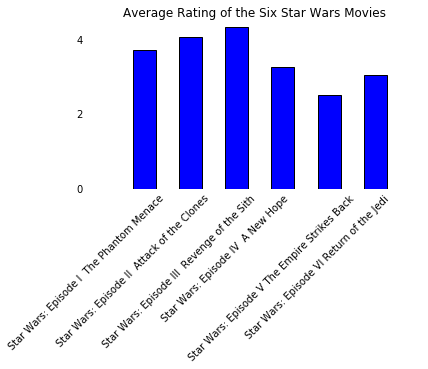

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots(figsize=(6,3))
positions = np.arange(len(movies)) + 0.75
label_positions = positions - 1
ax.bar(positions, star_wars.iloc[:, 9:15].mean(), 0.5)
ax.set_xticks(label_positions)
ax.set_yticks(range(0,6,2))
ax.set_xticklabels(movies, rotation=45)
ax.tick_params(bottom='off', top='off', left='off', right='off')
for inx,itm in ax.spines.items():
    itm.set_visible(False)
ax.set_title('Average Rating of the Six Star Wars Movies')
ax.axhline(0, color='blue')


### Star Wars: Episode III  Revenge of the Sith and Star Wars: Episode V The Empire Strikes Back have the highest and lowest ratings respectively

## Number of people who watched each of the movies

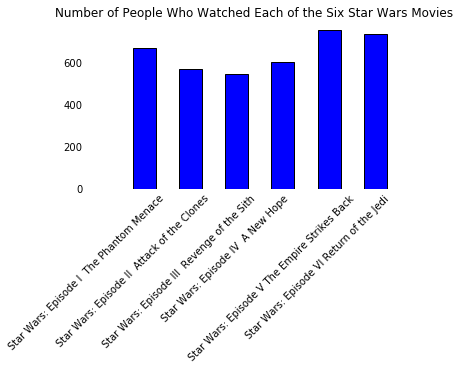

In [66]:
# calculate the number of people who watched the movies 
star_wars.iloc[:,3:9].sum()
# plot and comopare the numbers in a bar chart
fig, ax = plt.subplots(figsize=(6,3))
positions = np.arange(len(movies)) + 0.75
label_positions = positions - 1
ax.bar(positions, star_wars.iloc[:, 3:9].sum(), 0.5)
ax.set_xticks(label_positions)
ax.set_yticks(range(0,800,200))
ax.set_xticklabels(movies, rotation=45)
ax.tick_params(bottom='off', top='off', left='off', right='off')
ax.axhline(0, color='blue')
for inx,itm in ax.spines.items():
    itm.set_visible(False)
ax.set_title('Number of People Who Watched Each of the Six Star Wars Movies')

### Star Wars: Episode V The Empire Strikes Back and Episode VI Return of the Jedi have the largest audience. 

## How do Star Wars fans vs. non-fans think differently? Analyze the most viewed and highest rated movies again by groups

In [68]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [93]:
# calculate group mean and group sum for Fan and non-Fan groups
group_mean = star_wars.groupby('Do you consider yourself to be a fan of the Star Wars film franchise?').agg(np.mean)
group_sum = star_wars.groupby('Do you consider yourself to be a fan of the Star Wars film franchise?').agg(np.sum)

In [117]:
group_ratings = group_mean.iloc[:, 8:14].T
print(group_ratings.index)
print(group_ratings.columns)


Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')
Index([False, True], dtype='object', name='Do you consider yourself to be a fan of the Star Wars film franchise?')


In [124]:
group_ratings

Do you consider yourself to be a fan of the Star Wars film franchise?,False,True
ranking_1,2.936396,4.141304
ranking_2,3.591549,4.342391
ranking_3,4.193662,4.417423
ranking_4,3.933099,2.932971
ranking_5,2.862676,2.333333
ranking_6,3.471831,2.829710


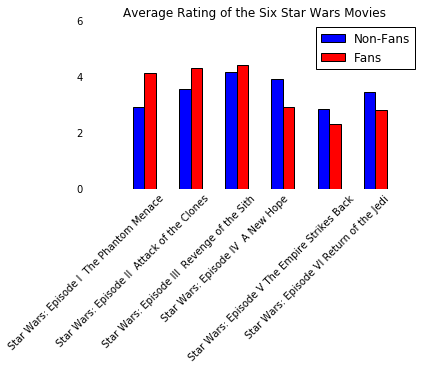

In [136]:
# repeat the above bar plots
# 1. plot the average rating of fans vs. non-fans
fig, ax = plt.subplots(figsize=(6,3))
positions1 = np.arange(len(movies)) + 0.75
positions2 = positions1 + 0.25
label_positions = positions - 1

p1=ax.bar(positions1, group_ratings.iloc[:,0], 0.25, color='blue')
p2=ax.bar(positions2, group_ratings.iloc[:,1], 0.25, color='red')

ax.set_xticks(label_positions)
ax.set_yticks(range(0,8,2))
ax.set_xticklabels(movies, rotation=45)
ax.tick_params(bottom='off', top='off', left='off', right='off')
for inx,itm in ax.spines.items():
    itm.set_visible(False)
ax.set_title('Average Rating of the Six Star Wars Movies')
ax.axhline(0, color='blue')

ax.legend((p1[0], p2[0]), ('Non-Fans', 'Fans'))

In [131]:
group_audience = group_sum.iloc[:, 2:8].T
print(group_audience.index)
print(group_audience.columns)
group_audience

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')
Index([False, True], dtype='object', name='Do you consider yourself to be a fan of the Star Wars film franchise?')


Do you consider yourself to be a fan of the Star Wars film franchise?,False,True
seen_1,173.0,500.0
seen_2,108.0,463.0
seen_3,100.0,450.0
seen_4,124.0,483.0
seen_5,220.0,538.0
seen_6,201.0,537.0


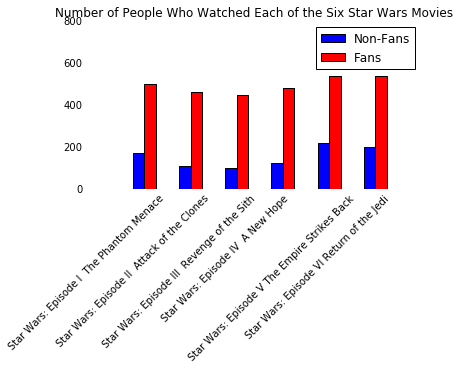

In [135]:

fig, ax = plt.subplots(figsize=(6,3))
positions1 = np.arange(len(movies)) + 0.75
positions2 = positions1 + 0.25

label_positions = positions - 1

p1=ax.bar(positions1, group_audience.iloc[:,0], 0.25, color='blue')
p2=ax.bar(positions2, group_audience.iloc[:,1], 0.25, color='red')


ax.set_xticks(label_positions)
ax.set_yticks(range(0,1000,200))
ax.set_xticklabels(movies, rotation=45)
ax.tick_params(bottom='off', top='off', left='off', right='off')
ax.axhline(0, color='blue')
for inx,itm in ax.spines.items():
    itm.set_visible(False)
ax.set_title('Number of People Who Watched Each of the Six Star Wars Movies')
ax.legend((p1[0], p2[0]), ('Non-Fans', 'Fans'))

### Apparently there are more Star Wars fans than non-fans who watched the movies. Fans tend to rate the first three movies higher than non-fans a